In [1]:
import fun as f
import math
import numpy as np
import time
import pickle
import os
import copy
import matplotlib.pyplot as plt
from matplotlib import pyplot
np.random.seed(400)

In [9]:
path = '/Users/user/Desktop/MSM/09-Deep Learning - KTH/assignments/assignment-2/Datasets/cifar-10-batches-py'
result_pics = '/Users/user/Desktop/MSM/09-Deep Learning - KTH/assignments/assignment-2/Result_Pics'

In [3]:
#read in data:
trainning_data = f.LoadBatch(os.path.join(path,'data_batch_1'))
validation_data = f.LoadBatch(os.path.join(path,'data_batch_2'))
test_data = f.LoadBatch(os.path.join(path,'test_batch'))

In [4]:
#initialize weights and bias:
W_1, b_1, W_2, b_2 = f.init_two_layers_w_b_param(trainning_data.data, trainning_data.labels, 50)

In [5]:
#Compute gradients analitically:
grad_b_1, grad_b_2, grad_W_1, grad_W_2 = f.ComputeGradsAnalt(
    trainning_data.data[:, 0:20], trainning_data.labels[:,0:20], b_1, b_2, W_1, W_2, lambda_=0)
#Compute gradients numerically:
#1.finite difference method.
grad_b_1_n, grad_b_2_n, grad_W_1_n, grad_W_2_n = f.ComputeGradsNum(
    trainning_data.data[:, 0:20], trainning_data.labels[:,0:20], W_1, W_2, b_1, b_2, h_=1e-6, lambda_=0)
#2.centered difference method.
grad_b_1_n_s, grad_b_2_n_s, grad_W_1_n_s, grad_W_2_n_s = f.ComputeGradsNumSlow(
    trainning_data.data[:, 0:20], trainning_data.labels[:,0:20], W_1, W_2, b_1, b_2, h_=1e-6, lambda_=0)

In [6]:
print('Max Relative error between gradients computed analitically and numerically using: finite diff method')
print(f.MaxRelativeError(grad_b_1, grad_b_1_n))
print(f.MaxRelativeError(grad_b_2, grad_b_2_n))
print(f.MaxRelativeError(grad_W_1, grad_W_1_n))
print(f.MaxRelativeError(grad_W_2, grad_W_2_n))
print('Max Relative error between gradients computed analitically and numerically using: centered diff method')
print(f.MaxRelativeError(grad_b_1, grad_b_1_n_s))
print(f.MaxRelativeError(grad_b_2, grad_b_2_n_s))
print(f.MaxRelativeError(grad_W_1, grad_W_1_n_s))
print(f.MaxRelativeError(grad_W_2, grad_W_2_n_s))

Max Relative error between gradients computed analitically and numerically using: finite diff method
8.844392605193683e-06
0.00010112146279395916
0.003626248845054414
6.050587200705587e-05
Max Relative error between gradients computed analitically and numerically using: centered diff method
8.546697380276077e-07
1.1557400414400866e-07
0.001961686602638457
8.903622176761293e-06


In [7]:
##Sanity Check
GD_params = f.params(n_batch=10, eta=0.01, n_epochs=200)
W_1__, b_1__, W_2__, b_2__, cf_train__, cf_val__, cl_train__, cl_val__, acc_train__, acc_val__ = f.MiniBatchGD(
    50, trainning_data.data[:, 0:100], trainning_data.labels[:,0:100],trainning_data.y[0:100],
    validation_data.data[:, 0:100], validation_data.labels[:,0:100], validation_data.y[0:100],
    GD_params, lambda_=0
)

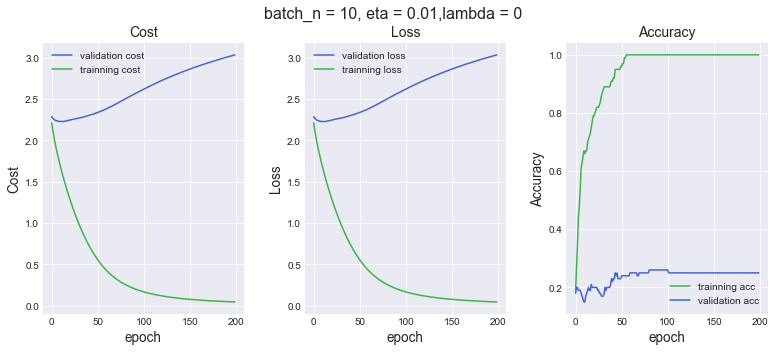

In [10]:
f.plot_cf_loss_acc(cf_val__, cf_train__, acc_train__, acc_val__, cl_train__, cl_val__, GD_params,lambda_=0,
                                 out_filename=os.path.join(result_pics,'test1'))

In [ ]:
n_s = k(Npts/Npts_batch)

In [191]:
def cyclical_learning_rates(eta_min, eta_max, n_s, n_cycles):
    """
    n_s: stepsize per cycle
    n_cycles: number of cycles
    """
    array_eta_val = np.zeros((1))
    cycle_ = np.hstack(
             (np.linspace(eta_min, eta_max, n_s+1),
             (np.linspace(eta_max, eta_min, n_s+1)[1:-1])))     
    for cycle in range(n_cycles):
        array_eta_val = np.hstack((array_eta_val, cycle_))
    array_eta_val = array_eta_val[1:]    
    array_eta_val = np.hstack((array_eta_val, eta_min))
    return array_eta_val

In [248]:
dfds = cyclical_learning_rates(1e-5, 1e-1, 500, 1)

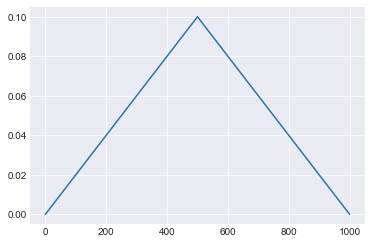

In [249]:
plt.plot(dfds)
plt.show()

In [246]:
##Exercise 3:
GD_params = f.params(n_batch=100, eta=0, n_epochs=10)
W_1_c, b_1_c, W_2_c, b_2_c, cf_train_c, cf_val_c, cl_train_c, cl_val_c, acc_train_c, acc_val_c = MiniBatchGD(
    50, 1e-5, 1e-1, 500, 1, trainning_data.data, trainning_data.labels,trainning_data.y,
    validation_data.data, validation_data.labels, validation_data.y,
    GD_params, lambda_=0.01
)

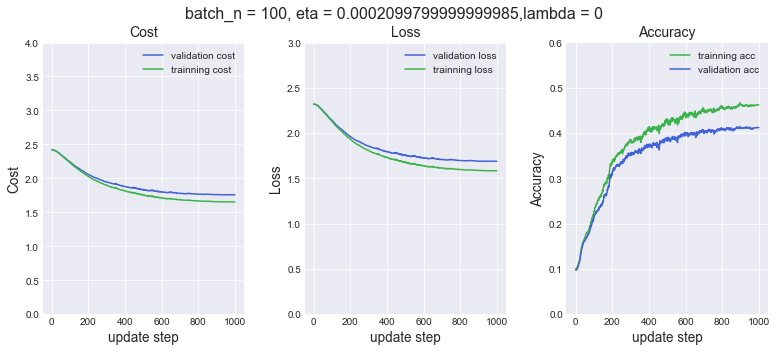

In [260]:
plot_cf_loss_acc_vs_step_counter(cf_val_c, cf_train_c, acc_train_c, acc_val_c, cl_train_c, cl_val_c, GD_params,lambda_=0,
                                 out_filename=os.path.join(result_pics,'none'))

In [259]:
def plot_cf_loss_acc_vs_step_counter(
                                    validation_list_cf_,
                                    trainning_list_cf_,
                                    acc_train_,
                                    acc_val_,
                                    cl_train_,
                                    cl_val_,
                                    GD_params_,
                                    lambda_,
                                    out_filename='none',
                                    label1 = 'trainning',
                                    label2 = 'validation',
                                    label3 = 'update step'
                                    ):
    """
    plot_validation_trainning_cf_acc plots the loss and accuracy for both, validation and trainning
    set for a given number of epochs.
    """
    t=range(len(validation_list_cf_))
    pyplot.figure(figsize=(13,5))
    pyplot.subplots_adjust(wspace=0.3)
    pyplot.suptitle(f'batch_n = {GD_params_.n_batch}, eta = {GD_params_.eta},lambda = {lambda_}', size =16)
    pyplot.style.use('seaborn-darkgrid')
    # sp1
    pyplot.subplot(131)
    pyplot.plot(t, validation_list_cf_, '#4363d8', label = label2+' cost')
    pyplot.plot(t, trainning_list_cf_, '#3cb44b', label = label1+' cost')
    pyplot.legend(loc='best')
    pyplot.xlabel(label3, size = 13.5)
    pyplot.ylabel('Cost', size = 13.5)
    pyplot.ylim(0, 4)
    pyplot.title('Cost',size = 14)
    # sp2
    pyplot.subplot(132)
    pyplot.plot(t, cl_val_, '#4363d8', label = label2+' loss')
    pyplot.plot(t, cl_train_, '#3cb44b', label = label1+' loss')
    pyplot.legend(loc='best')
    pyplot.xlabel(label3, size = 13.5)
    pyplot.ylabel('Loss', size = 13.5)
    pyplot.ylim(0.0, 3)
    pyplot.title('Loss', size = 14)
    # sp3
    pyplot.subplot(133)
    pyplot.plot(acc_train_,'#3cb44b', label =  label1+' acc')
    pyplot.plot(acc_val_, '#4363d8',  label= label2+' acc')
    pyplot.legend(loc='best')
    pyplot.xlabel(label3, size = 13.5)
    pyplot.ylabel('Accuracy', size = 13.5)
    pyplot.ylim(0.0, 0.6)
    pyplot.title('Accuracy', size = 14)
    if out_filename=='none':
        pyplot.show()
    else:
        pyplot.savefig(out_filename)
        pyplot.show()

In [240]:
def MiniBatchGD(m_,eta_min, eta_max, n_s, n_cycles, X_, Y_, y_, X_val, Y_val, y_val, GD_params, lambda_=0):
    
    cf_train = []
    cf_val = []
    cl_train = []
    cl_val = []
    acc_train = []
    acc_val = []
    
    Npts = X_.shape[1]

    array_eta = cyclical_learning_rates(eta_min, eta_max, n_s, n_cycles)
    
#     n_s = k(Npts//GD_params.n_batch)
#     n_cycles = total_n_steps // n_s
#     k = GD_params.n_epochs // n_cycles
    
    total_n_steps = GD_params.n_epochs * (Npts // GD_params.n_batch)
    W_1, b_1, W_2, b_2 = f.init_two_layers_w_b_param(X_, Y_, m_)
    step_counter = 0
    for epoch in range(GD_params.n_epochs):
        
        for j in range(Npts // GD_params.n_batch):
        
            GD_params.eta = array_eta[step_counter]
            j_start = j * GD_params.n_batch
            j_end = (j + 1) * GD_params.n_batch
            Xbatch = X_[:, j_start:j_end]
            Ybatch = Y_[:, j_start:j_end]

            grad_b_1_t, grad_b_2_t, grad_W_1_t, grad_W_2_t = f.ComputeGradsAnalt(
                                                        Xbatch, Ybatch, b_1, b_2, W_1, W_2, lambda_)
            W_1 = W_1 - GD_params.eta * grad_W_1_t
            b_1 = b_1 - GD_params.eta * grad_b_1_t
            W_2 = W_2 - GD_params.eta * grad_W_2_t
            b_2 = b_2 - GD_params.eta * grad_b_2_t
            
            step_counter = step_counter + 1
            
            # cost per epoch
            trainning_cost = f.full_forward_and_cost(X_, Y_, W_1, W_2, b_1, b_2, lambda_)
            validation_cost =f.full_forward_and_cost(X_val, Y_val, W_1, W_2, b_1, b_2, lambda_)

            # # loss per epoch
            trainning_loss = f.full_forward_and_cost(X_, Y_, W_1, W_2, b_1, b_2, 0)
            validation_loss = f.full_forward_and_cost(X_val, Y_val, W_1, W_2, b_1, b_2, 0)

            cf_train.append(trainning_cost)
            cf_val.append(validation_cost)

            cl_train.append(trainning_loss)
            cl_val.append(validation_loss)

            # accuracy per epoch
            acc_train_ = f.ComputeAccuracy(X_, y_, W_1, W_2, b_1, b_2)
            acc_val_ = f.ComputeAccuracy(X_val, y_val, W_1, W_2, b_1, b_2)

            acc_train.append(acc_train_)
            acc_val.append(acc_val_)


    return W_1, b_1, W_2, b_2, cf_train, cf_val, cl_train, cl_val, acc_train, acc_val
